In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_outlier_treated.csv')

In [4]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3576 entries, 0 to 3576
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3576 non-null   object 
 1   society              3575 non-null   object 
 2   sector               3576 non-null   object 
 3   price                3576 non-null   float64
 4   price_per_sqft       3576 non-null   float64
 5   area                 3576 non-null   float64
 6   areaWithType         3576 non-null   object 
 7   bedRoom              3576 non-null   int64  
 8   bathroom             3576 non-null   int64  
 9   balcony              3576 non-null   object 
 10  floorNum             3559 non-null   float64
 11  facing               2549 non-null   object 
 12  agePossession        3576 non-null   object 
 13  super_built_up_area  1874 non-null   float64
 14  built_up_area        1605 non-null   float64
 15  carpet_area          1845 non-null   float6

In [8]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1702
built_up_area          1971
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

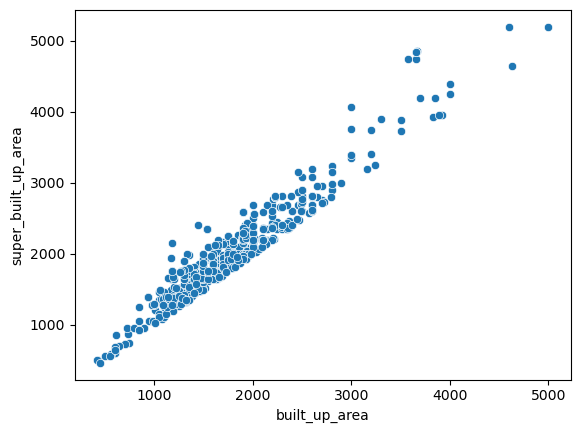

In [12]:
sns.scatterplot(x = 'built_up_area',y = 'super_built_up_area',data = df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

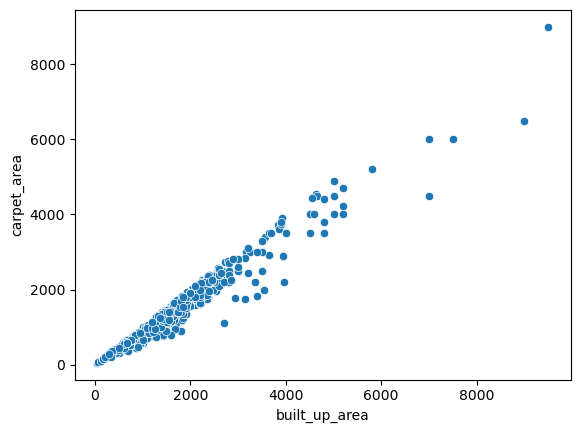

In [13]:
sns.scatterplot(x = 'built_up_area',y = 'carpet_area',data = df)

In [14]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [15]:
all_present_df.shape

(531, 23)

In [16]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [17]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [18]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [19]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [20]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_6288\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [21]:
df.update(sbc_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1702
built_up_area          1550
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [23]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [24]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_6288\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [25]:
df.update(sb_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1702
built_up_area           676
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [27]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [28]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_6288\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [29]:
df.update(c_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1702
built_up_area             0
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

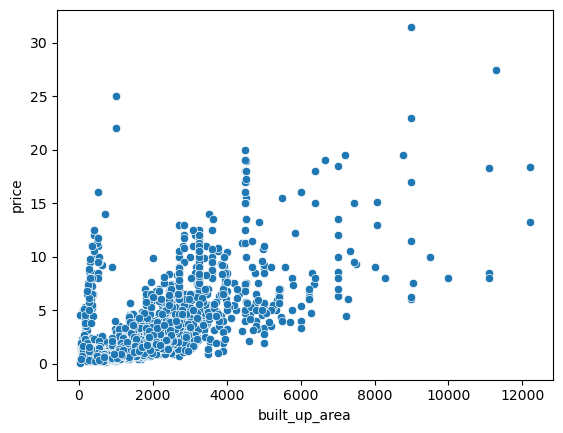

In [34]:
sns.scatterplot(x = 'built_up_area',y = 'price',data = df)

In [35]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [38]:
anamoly_df.sample(5)

,price,area,built_up_area
2872,5.50,3240.0,355.0
1066,5.80,1935.0,1935.0
1537,5.80,1800.0,1800.0
346,2.78,1829.0,1654.0
2743,8.00,3132.0,387.0


In [39]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [40]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

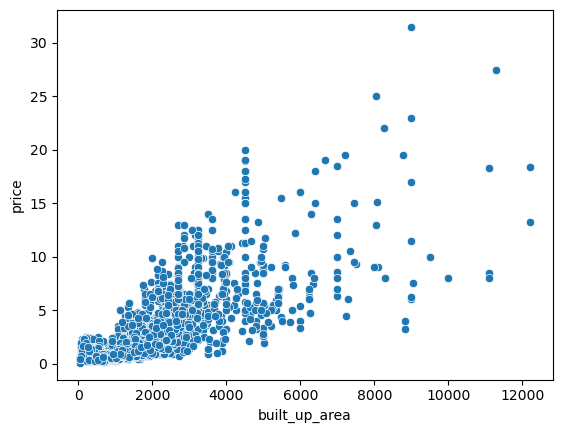

In [42]:
sns.scatterplot(x = 'built_up_area',y = 'price',data = df)

In [44]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [45]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1027
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [46]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
503,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,moderately old,585.0,0,0,0,0,0,0,0
772,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,old property,4320.0,0,0,0,0,0,0,9
1302,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,old property,210.0,0,0,0,0,0,0,0
1461,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,relatively new,3240.0,0,0,0,0,0,0,21
1474,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,under construction,1242.0,0,0,0,0,0,0,0
1962,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,old property,360.0,0,0,0,0,0,0,0
2063,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,moderately old,3240.0,0,1,1,1,0,0,88
2170,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,moderately old,4635.0,0,0,0,0,0,0,0
2286,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,relatively new,5200.0,0,1,1,1,0,1,114
2453,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,moderately old,2800.0,0,1,0,1,0,1,130


In [47]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [48]:
df['floorNum'].fillna(2.0,inplace=True)

<Axes: ylabel='count'>

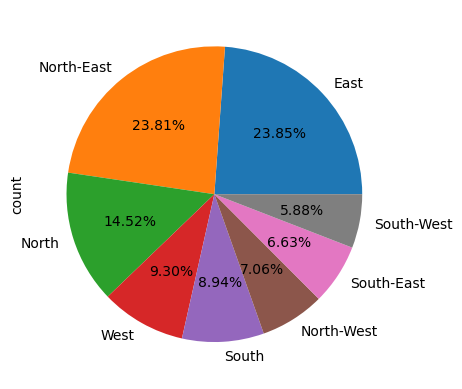

In [49]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [50]:
df.drop(columns=['facing'],inplace=True)

In [51]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [53]:
df[df.society.isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2550,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,under construction,1625.0,0,0,0,0,0,0,0


In [54]:
1625.0*3692.0

5999500.0

In [55]:
df['agePossession'].value_counts()


agePossession
relatively new        1606
new property           562
moderately old         549
undefined              302
old property           294
under construction     263
Name: count, dtype: int64

In [57]:
df[df['agePossession'] == 'undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,undefined,2360.0,0,0,0,0,0,0,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,undefined,1297.0,0,0,0,0,0,0,0
48,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,undefined,1423.0,0,0,0,0,0,0,45
70,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,undefined,750.0,0,0,0,0,0,0,0
74,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,undefined,1980.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,undefined,1242.0,0,0,0,0,0,0,59
3529,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,undefined,594.0,0,0,0,0,0,0,0
3541,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,undefined,1364.0,0,0,0,0,0,0,0
3548,house,independent,sector 28,0.45,10000.0,5,3,0,1.0,undefined,50.0,0,0,0,0,0,0,0


In [60]:
def mode_based_imputation(row):
    if row['agePossession'] == 'undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [62]:
df['agePossession'].value_counts()

agePossession
relatively new        1713
new property           602
moderately old         598
old property           329
under construction     277
undefined               57
Name: count, dtype: int64

In [66]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [68]:
df['agePossession'].value_counts()

agePossession
relatively new        1725
moderately old         605
new property           603
old property           332
under construction     277
undefined               34
Name: count, dtype: int64

In [70]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [72]:
df['agePossession'].value_counts()

agePossession
relatively new        1727
moderately old         637
new property           603
old property           332
under construction     277
Name: count, dtype: int64

In [73]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [74]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)